In [10]:
import numpy as np
from msmbuilder.feature_selection import VarianceThreshold
from msmbuilder.decomposition import tICA
from msmbuilder.cluster import MiniBatchKMeans
from msmbuilder.msm import MarkovStateModel
from sklearn.pipeline import Pipeline
from glob import glob

In [11]:
# variance_cut
# 		 threshold 	 0.0
# tica
# 		 commute_mapping 	 False
# 		 kinetic_mapping 	 True
# 		 lag_time 	 1
# 		 n_components 	 4
# 		 shrinkage 	 None
# cluster
# 		 batch_size 	 100
# 		 compute_labels 	 True
# 		 init 	 k-means++
# 		 init_size 	 None
# 		 max_iter 	 100
# 		 max_no_improvement 	 10
# 		 n_clusters 	 566
# 		 n_init 	 3
# 		 random_state 	 None
# 		 reassignment_ratio 	 0.01
# 		 tol 	 0.0
# 		 verbose 	 0
# msm
# 		 ergodic_cutoff 	 on
# 		 lag_time 	 50
# 		 n_timescales 	 2
# 		 prior_counts 	 0
# 		 reversible_type 	 mle
# 		 sliding_window 	 True
# 		 use_gap 	 None
# 		 verbose 	 True

In [12]:
traj_paths = glob('/home/robert/Datasets/DHFR/train/alpha_angle/trajectory-*.npy')

len(traj_paths)

350

In [13]:
trajs = [np.load(x) for x in traj_paths]

In [14]:
tica=tICA(kinetic_mapping=True, lag_time=1, n_components=4)
cluster = MiniBatchKMeans(n_clusters=566)
ttrajs = tica.fit_transform(trajs)
ctrajs = cluster.fit_transform(ttrajs)
# ctrajs = pipe.fit_transform(trajs)

/home/robert/anaconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1381: RuntimeWarning: init_size=300 should be larger than k=566. Setting it to 3*k
  init_size=init_size)


In [15]:
lags = np.arange(10,70,5)
n_timescales = 10
timescales = np.zeros((lags.shape[0], n_timescales))
models = []

for i,lag in enumerate(lags):
    msm = MarkovStateModel(lag_time=lag, n_timescales=n_timescales)
    msm.fit_transform(ctrajs)
    timescales[i] = msm.timescales_
    models.append(msm)

MSM contains 3 strongly connected components above weight=0.10. Component 0 selected, with population 97.142857%
MSM contains 3 strongly connected components above weight=0.07. Component 0 selected, with population 97.142857%
MSM contains 3 strongly connected components above weight=0.05. Component 0 selected, with population 97.142857%
MSM contains 3 strongly connected components above weight=0.04. Component 0 selected, with population 97.142857%
MSM contains 3 strongly connected components above weight=0.03. Component 0 selected, with population 97.142857%
MSM contains 3 strongly connected components above weight=0.03. Component 0 selected, with population 97.142857%
MSM contains 3 strongly connected components above weight=0.03. Component 0 selected, with population 97.142857%
MSM contains 3 strongly connected components above weight=0.02. Component 0 selected, with population 97.142857%
MSM contains 3 strongly connected components above weight=0.02. Component 0 selected, with popul

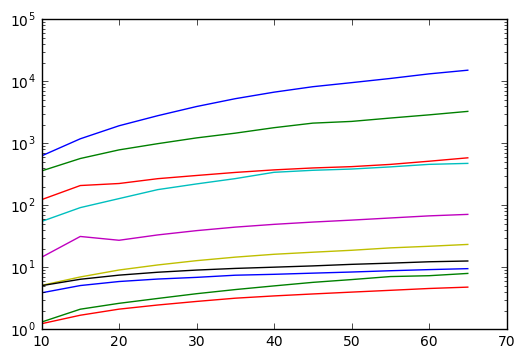

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(timescales.shape[1]):
    plt.plot(lags, timescales.T[i]/1000)
    plt.yscale('log')

In [17]:
mm = models[4]

In [18]:
mm.n_states_

536

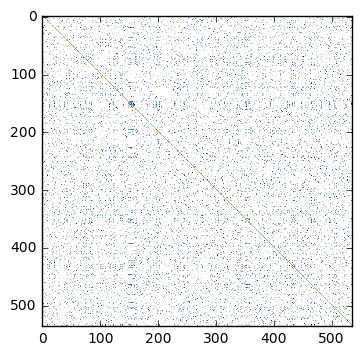

In [19]:
plt.imshow(np.log(mm.countsmat_))

In [20]:
txx = np.concatenate(ttrajs)

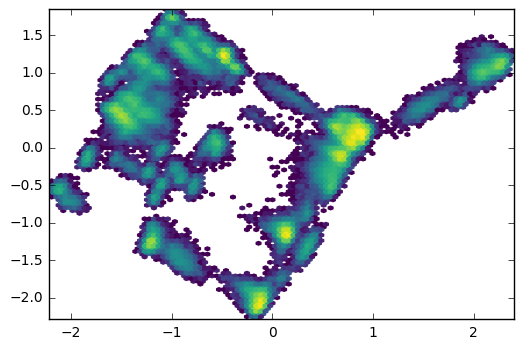

In [21]:
plt.hexbin(txx[:,0], txx[:,1], bins='log', mincnt=1, cmap='viridis')
# plt.scatter(cluster.cluster_centers_[:,0],
#             cluster.cluster_centers_[:,1], 
#             s=50, c='w', alpha=0.5)

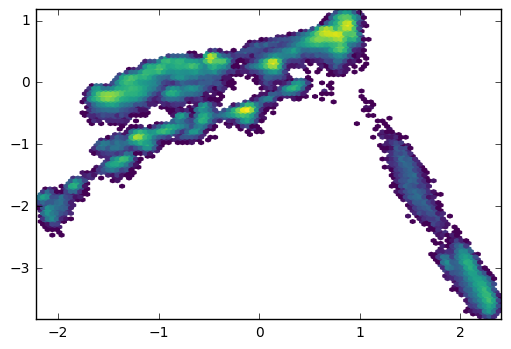

In [22]:
plt.hexbin(txx[:,0], txx[:,2], bins='log', mincnt=1, cmap='viridis')
# plt.scatter(cluster.cluster_centers_[:,0],
#             cluster.cluster_centers_[:,1], 
#             s=50, c='w', alpha=0.5)

<Container object of 536 artists>

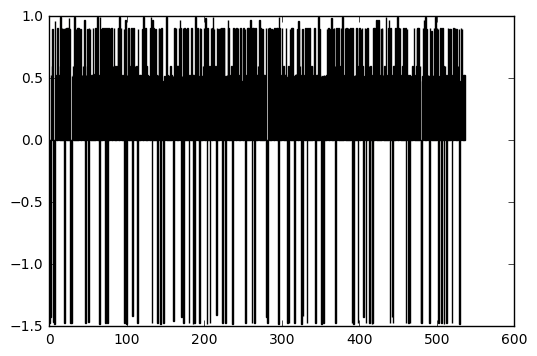

In [23]:
plt.bar(np.arange(mm.n_states_), mm.right_eigenvectors_[:,1])